# Introduction 
Dans le cadre de la réalisation d'un projet Data de fin de cursus au sein d'Hetic, nous sommes amenés à déveloper un modèle de prédiction de prix d'occasion de véhicules en se basant sur des données brutes sans traitement et sans mise en forme préalables. <br>

Ce projet se veut être le plus complet possible (cycle de vie d'un projet data) et reflettant les vraies problèmatiques qu'un data sceintist rencontre dans la pratique. <br>

Nous devons explorer, netoyer des données et les enrichir si besoin. Puis, concevoir et implémenter un modèle de prédiction. Pour finir, une réflexion sur la mise en production est demandée. <br>

Pour des soucis d'organisation, nous réalisons ce projet à travers plusieurs notebooks. Des objectifs spécifiques sont définits dans chaque notebook.  
* 1_DataPreExploration :
* 2_Collecte_data_externe

# 1. Exploratory Data Analysis
## Objectifs :
* Comprendre nos données
* Développer une première stratégie de modilisation

## Plan :
1. Analyse de forme
2. Pre-processing :
    * 2.1. Champs Mileage, Online et Description
    * 2.2. Champs 'version'
    * 2.3. Champs 'option'
    * 2.4. Champs 'couleur'
3. Analyse des données manquantes
4. Analyse univariable
    * 4.1. Les données manquantes
    * 4.2. Visualisation de la target
    * 4.3. Visualisation des variables numériques
    * 4.4. Visualisation des variables qualitatives
5. Analyse bivariable
    * 5.1. Les variables numériques
    * 5.2. La variable 'Fuel'
    * 5.3. La variable 'Gearbox'
6. Modelisation
    * 6.1. Définition de la metrique MAPE
    * 6.2. Définition des transformations de variables
    * 6.3. Selection d'un échantillon (30% du dataset initial)
    * 6.4. Selection des features
    * 6.5. Entrainement de plusieurs modèles
    * 6.6. Ajout de la feature 'couleur_dominante'
    * 6.7. Hyper-paramètre n_estimators=100

7. Conclusion

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import re
pd.set_option('max_colwidth', 10000)
pd.set_option('display.max_column', 30)
#pd.set_option('display.max_row', 10)


In [3]:
%%HTML
<style>.dataframe th, td:first-child{background:#3f577c;font-family:monospace;color:white;border:3px solid white;
text-align:left !important;}#codex{float:right;}</style>

In [4]:
df = pd.read_csv('../Datasets/Data_cars.csv')

## 1. Analyse de forme

In [5]:
df.head(1)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"


In [6]:
df.dtypes

Price          float64
Make            object
Model           object
Model_year       int64
Mileage         object
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object

In [7]:
df.dtypes.value_counts()

object     7
float64    1
int64      1
dtype: int64

In [8]:
df[['Description']].head(1)

,Description
0,"modele: 308 (2E GENERATION), version: 1.6 HDI FAP 92CH BUSINESS 5P, puissance_fiscale: 4, portes: 5.0, options: banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle, couleur: BLANC BANQUISE"


**Description** contient plusieurs sous-champs qui sont séparés par une **','**

Le sous-champs Options contient des paramètres séparés par des **';'**

Certains paramètres dans Options contiennent des valeurs spécifiques. 
Leur patern est : **'; parametre : valeur'**. 

Pour les paramettres suivants dans Options : 
- finition brillantes pneus 
- noir anthracite finition brillantes avec pneus
- 5 J x 21 Pneus '
- réglages électriques des sièges -Conducteur

le patern est **', parametre : valeur'**

In [9]:
# Trouver les détail des champs dans Decription : separation par des ','
str_list = df['Description'].str.findall(r'(^.[^,; ]*?:|, [^,; ]*?:)').values.tolist()
str_list = list(filter(None, str_list))
flat_list = [item for sublist in str_list for item in sublist]
details = set(flat_list)
details = [w.replace(', ', '') for w in details]
details = [w.replace(':', '') for w in details]
print("Description contient les champs suivant : \n")
for item in details:
    print("- "+ item+"\n")

Description contient les champs suivant : 

- portes

- couleur

- version

- puissance_fiscale

- modele

- options



**Traget** : 
* Price

**Pre-processing à faire** :
1. Transfomer la colonne **Mileage** en entier
2. Transformer **Online** au format datetime et extraire : année, mois, jour ...etc.
3. Créer de la colonne **age**
3. Extraire les informations depuis **Description**

## 2. Pre-processing

### 2.1. Champs Mileage, Online et Description

In [10]:
def pre_porcessing (df):
    # 1. Transfomer la colonne Mileage en entier
    df['Mileage'] = df['Mileage'].str.replace(".0 km","")
    df['Mileage'] = df['Mileage'].astype("int64")

    # 2. Transformer **Online** au format datetime et extraire : année, mois, jour ...etc.
    df['Online'] = pd.to_datetime(df['Online'], format='%d/%m/%Y à %Hh%M')

    df['Online_date'] = df['Online'].dt.date
    df['Online_time'] = df['Online'].dt.time

    df['Online_year'] = df['Online'].dt.year
    df['Online_month'] = df['Online'].dt.month
    df['Online_month_day'] = df['Online'].dt.day
    df['Online_hour'] = df['Online'].dt.hour
    df['Online_minute'] = df['Online'].dt.minute
    df['Online_week_day'] = df['Online'].dt.weekday

    # 3. Création de la colonne age
    df['age'] = df['Online_year'] - df['Model_year']
    
    # 4. Extraire les informations depuis Description
    df['modele'] = df['Description'].str.extract(r'(\bmodele\: \b.*?,)', expand=True) 
    df['modele'] = df['modele'].str.replace("modele: ", "")
    df['modele'] = df['modele'].str.replace(",", "")

    df['version'] = df['Description'].str.extract(r'(\bversion\b.*?,)', expand=True)       
    df['version'] = df['version'].str.replace("version: ", "")
    df['version'] = df['version'].str.replace(",", "")

    df['puissance_fiscale'] = df['Description'].str.extract(r'(\bpuissance_fiscale\: \b.*?,)', expand=True)       
    df['puissance_fiscale'] = df['puissance_fiscale'].str.replace("puissance_fiscale: ", "")
    df['puissance_fiscale'] = df['puissance_fiscale'].str.replace(",", "")
    df['puissance_fiscale'] = df['puissance_fiscale'].astype("int64")

        
    df['portes'] = df['Description'].str.extract(r'(\bportes\: \b.*?,)', expand=True)       
    df['portes'] = df['portes'].str.replace("portes: ", "")
    df['portes'] = df['portes'].str.replace(",", "")
    df['portes'] = df['portes'].astype("float")

    df['couleur'] = df['Description'].str.extract(r'(\bcouleur\: \b.*?$)', expand=True)       
    df['couleur'] = df['couleur'].str.replace("couleur: ", "")
    df['couleur'] = df['couleur'].str.upper()

    df['options'] = df['Description'].str.extract(r'(\boptions\b.*, couleur)', expand=True)       
    df['options'] = df['options'].str.replace("options: ", "")
    df['options'] = df['options'].str.replace(", couleur", "")
    
    df.drop(columns='Description', inplace=True)
    return df

In [11]:
data_preproc = pre_porcessing(df.copy())

In [60]:
data_preproc.head(1)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Online_date,Online_time,Online_year,Online_month,Online_month_day,Online_hour,Online_minute,Online_week_day,age,modele,version,puissance_fiscale,portes,couleur,options,Cylindree,chevaux_vapeur,couleur_dominante,couleur_type_peinture
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,2018-07-06 03:47:00,2018-07-06,03:47:00,2018,7,6,3,47,4,4,308 (2E GENERATION),1.6 HDI FAP 92CH BUSINESS 5P,4,5.0,BLANC BANQUISE,banquette arrière 3 places;volant cuir;cache bagages;airbag frontal;banquette 1/3 - 2/3;sièges rang 2 rabattables à plat;vitres teintées;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;rétroviseurs électriques et dégivrants;siège conducteur avec réglage lombaire;vitres électriques;feux de freinage d'urgence;banquette rabattable;feux ar. à LED;AFU;contrôle de pression des pneus;airbags front. + lat.;blanc banquise;lampes de lecture à l'arrière;sièges réglables en hauteur;alarme d'oubli d'extinction des feux;EBD;volant sport;température extérieure;système audio;becquet;feux automatiques;fermeture électrique;ESP;fermeture électrique automatique;bacs de portes avant;anti patinage;accoudoir central avant;commandes du système audio au volant;fixations ISOFIX;poches d'aumonières;lampes de lecture à l'avant;lunette arrière dégivrante;essuie-glace arrière;ordinateur de bord;phares halogènes;climatisation;volant réglable en hauteur et profondeur;siège conducteur réglable hauteur;boite à gants réfrigérée;ABS;ceintures avant ajustables en hauteur;prise 12V;ecran tactile multifonction;FAP;3 ceintures ar. 3 points;ouverture des vitres séquentielle,1.6,92.0,BLANC,NaN


### 2.2. Champs 'version'

In [13]:
def pre_proc_version(df):
    df['Cylindree'] = df['version'].str.extract(r'(\d\.\d)', expand=True)
    df['Cylindree'] = df['Cylindree'].astype("float")

    df['chevaux_vapeur'] = df['version'].str.extract(r'( \d+ |\d+CH| \d+$)', expand=True)
    df['chevaux_vapeur']= df['chevaux_vapeur'].str.replace("CH", "")
    df['chevaux_vapeur'] = df['chevaux_vapeur'].str.replace(" ", "")
    
    df['chevaux_vapeur'] = df['chevaux_vapeur'].astype("float")

    return df

In [14]:
data_preproc = pre_proc_version(data_preproc)

### 2.3. Champs 'option'

In [15]:
# suppression des quotes
data_preproc['options'] = data_preproc['options'].str.replace("\"", "")

#Replace '' sting with Nan
data_preproc['options'].replace('', np.nan, inplace=True)

In [ ]:
### Création de listes d'options
#les option sont séparées par des ';'
df['options'].str.split(";")

### 2.4. Champs Couleur

In [357]:
#import nltk
#from nltk.tokenize import word_tokenize
#from nltk.tag import pos_tag

In [16]:
import urllib.request
from bs4 import BeautifulSoup

html = urllib.request.urlopen('http://www.ludowalsh.com/HTM/Liste_de_couleurs.htm').read()

soup = BeautifulSoup(html, 'html.parser')

color_tables = soup.find_all('table', class_="wikitable")
couleurs = []
for table in color_tables:  
    couleurs.append(table.find_all(lambda tag: tag.name == "a"))
    
couleurs = [item for sublist in couleurs for item in sublist]

couleurs_list = []
for item in couleurs:
    groups = re.search(r">.*<", str(item))
    if groups!= None:
        #for group in groups.group():
        couleurs_list.append(groups.group())

couleurs_list = set(couleurs_list)
couleurs_all = []
for item in couleurs_list:
    couleurs_all.append(item.replace('>','').replace('<','').upper())

# ordre suivant le nombre de mots: prévéligier les couleurs composées (plus de choix ... parsemé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=False)
# ordre suivant le nombre de mots: prévéligier les couleurs unique (agrégé)
couleurs_all.sort(key=lambda x: len(x.split()), reverse=True)

print("Nombre de couleurs : ",len(couleurs_all))

Nombre de couleurs :  405


In [17]:
def func_couleur(s):
    couleur = np.nan
    for i in range(len(couleurs_all)):
        if couleurs_all[i] in str(s):
            couleur = couleurs_all[i]
    return couleur

def func_type_peinture(s, types_peinture):
    type_ = np.nan
    for t in types_peinture:
        if t in str(s):
            type_ = t
    return type_



In [18]:
data_preproc['couleur_dominante'] = data_preproc.apply(lambda row : func_couleur(row['couleur']), axis = 1)

types_peinture =['METAL', 'NACRE', 'CHROME', 'CANDY', 'VERNI', ' MAT', 'UNI', 'OPAQE', 'CRISTAL']
data_preproc['couleur_type_peinture'] = data_preproc.apply(lambda row : func_type_peinture(row['couleur'],types_peinture), axis = 1)

## 3. Analyse des données manquantes

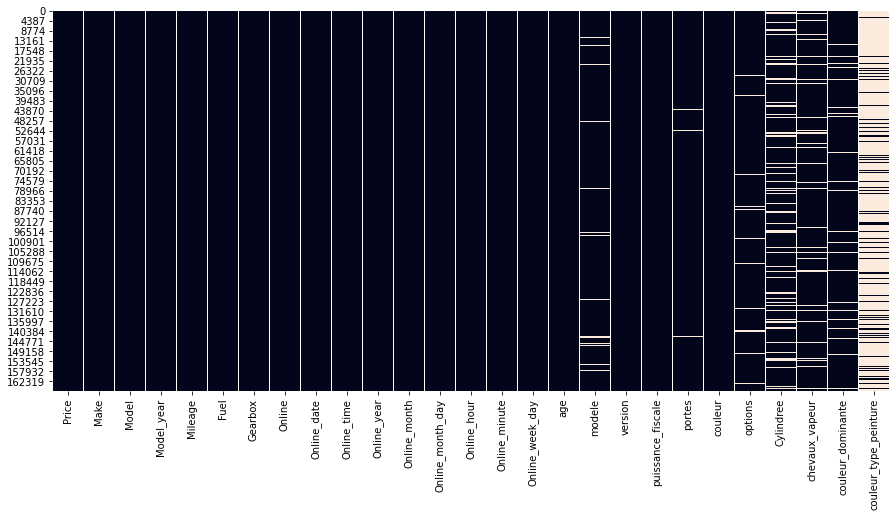

In [19]:
# Visualiser les données manquates
plt.figure(figsize=(15,7))
sns.heatmap(data_preproc.isna(), cbar=False)

In [20]:
(data_preproc.isna().sum()/data_preproc.shape[0]*100).sort_values(ascending=False)

couleur_type_peinture    79.721047
Cylindree                18.062929
chevaux_vapeur            8.921683
couleur_dominante         5.039143
options                   2.794925
modele                    2.789526
portes                    0.773269
couleur                   0.064789
Fuel                      0.000000
Online                    0.000000
Gearbox                   0.000000
Model                     0.000000
Mileage                   0.000000
Model_year                0.000000
Online_time               0.000000
Make                      0.000000
Online_date               0.000000
Online_hour               0.000000
Online_year               0.000000
Online_month              0.000000
Online_month_day          0.000000
Online_minute             0.000000
Online_week_day           0.000000
age                       0.000000
version                   0.000000
puissance_fiscale         0.000000
Price                     0.000000
dtype: float64

In [21]:
data_preproc.columns[data_preproc.isna().sum()/data_preproc.shape[0] !=0]

Index(['modele', 'portes', 'couleur', 'options', 'Cylindree', 'chevaux_vapeur',
       'couleur_dominante', 'couleur_type_peinture'],
      dtype='object')

Il y a des données manquantes dans **couleur_type_peinture**, **Cylindree**, **chevaux_vapeur**, **couleur_dominante**, **option**, **model**, **portes** et **couleur**.

## 4. Analyse univariable

### 4.1. Visualisation de la target

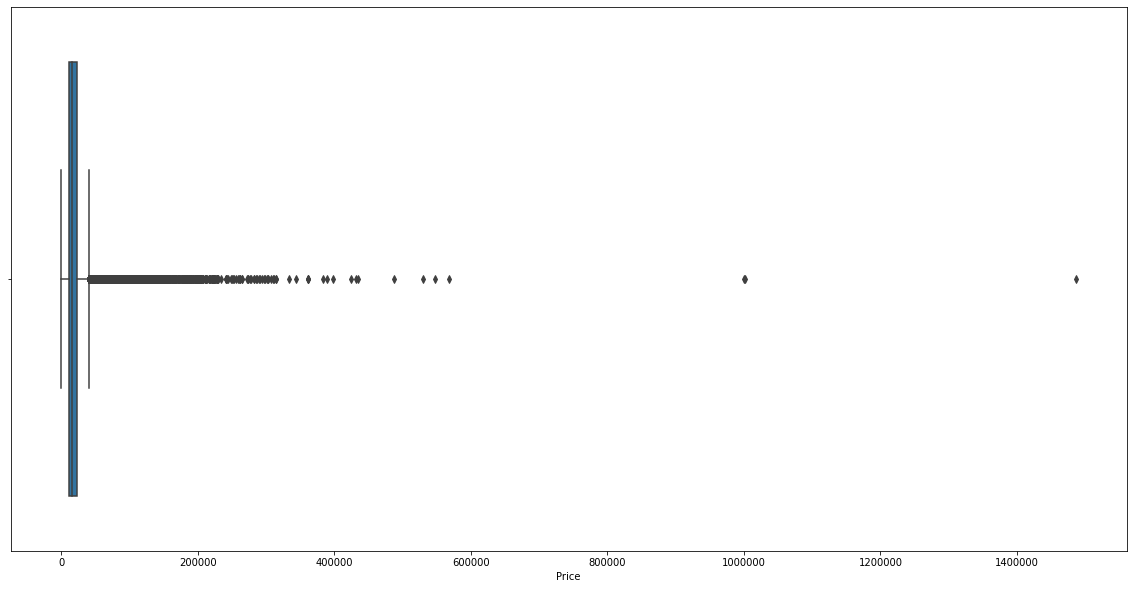

In [22]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(data_preproc['Price'])

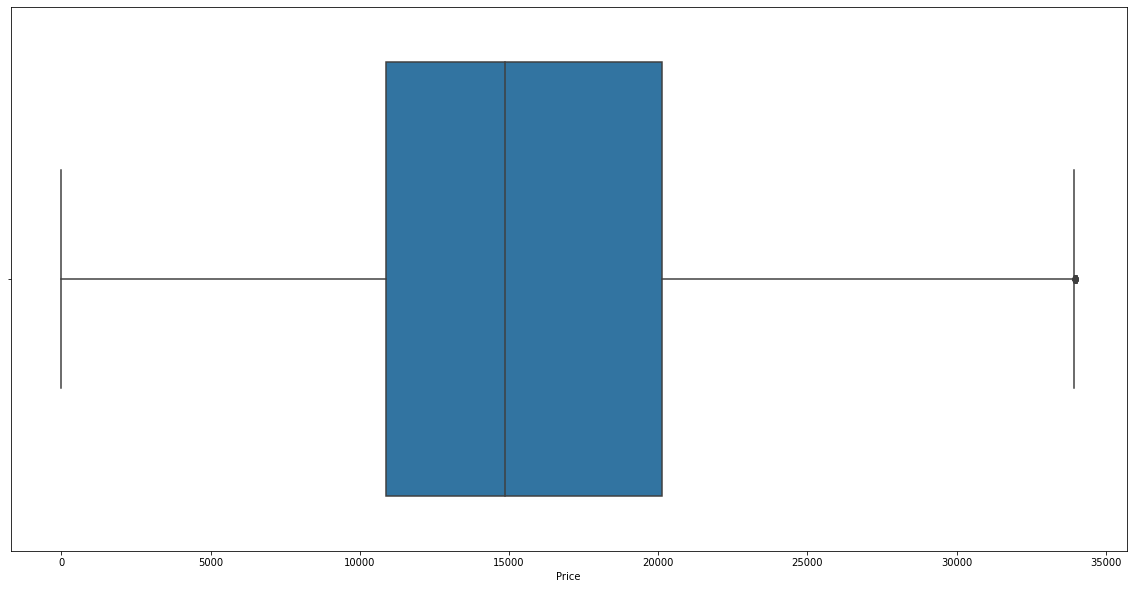

In [23]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(data_preproc[data_preproc['Price']<34000]['Price'])

In [24]:
print("Prix supérieur à 35.000€ : %.2f dans le dataset" %(data_preproc[data_preproc['Price']>34000].shape[0]/data_preproc.shape[0]*100))
print("Prix supérieur à 50.000€ : %.2f dans le dataset" %(data_preproc[data_preproc['Price']>50000].shape[0]/data_preproc.shape[0]*100))
print("Prix supérieur à 75.000€ : %.2f dans le dataset" %(data_preproc[data_preproc['Price']>75000].shape[0]/data_preproc.shape[0]*100))
print("Prix supérieur à 100.000€ : %.2f dans le dataset" %(data_preproc[data_preproc['Price']>100000].shape[0]/data_preproc.shape[0]*100))
print("Prix inferieur à 100€ : %.3f dans le dataset" %(data_preproc[data_preproc['Price']==1].shape[0]/data_preproc.shape[0]*100))

Prix supérieur à 35.000€ : 9.17 dans le dataset
Prix supérieur à 50.000€ : 3.38 dans le dataset
Prix supérieur à 75.000€ : 1.11 dans le dataset
Prix supérieur à 100.000€ : 0.48 dans le dataset
Prix inferieur à 100€ : 0.002 dans le dataset


**Outliers :** 
* Les prix supérieurs à 100.000€ sont à 0,5% dans le dataset (806 observation).
* Les prix à 1€ sont à 0,002 (4 observations). Des valeurs abérentes


### 4.2. Visualisation des variables numériques

<Figure size 432x288 with 0 Axes>

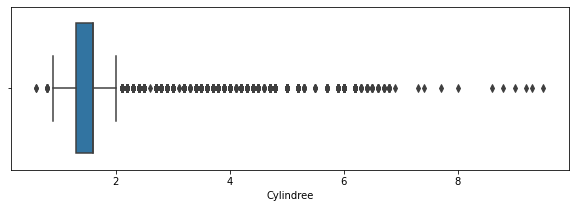

<Figure size 432x288 with 0 Axes>

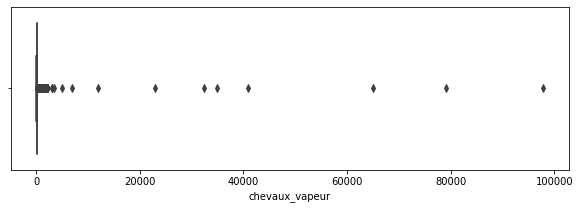

<Figure size 432x288 with 0 Axes>

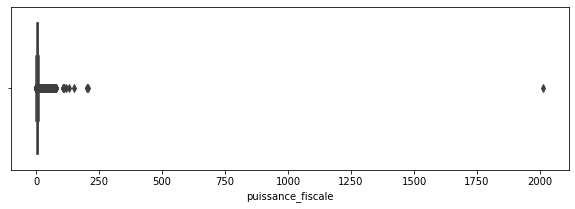

<Figure size 432x288 with 0 Axes>

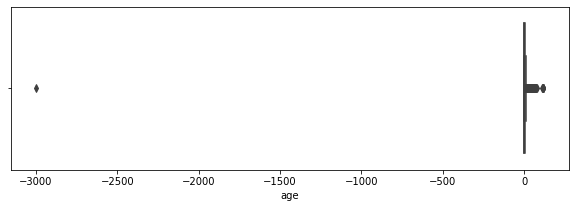

<Figure size 432x288 with 0 Axes>

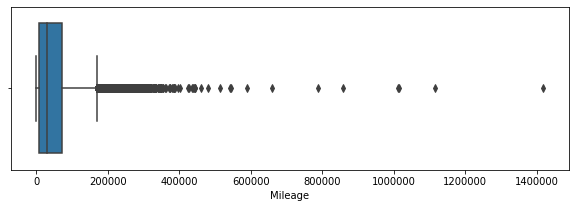

<Figure size 432x288 with 0 Axes>

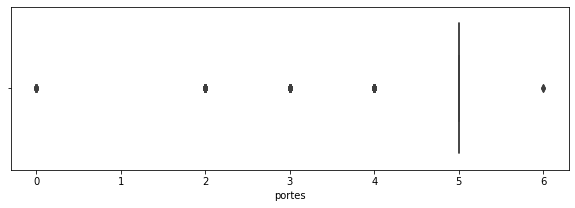

In [25]:
for col in ['Cylindree', 'chevaux_vapeur','puissance_fiscale', 'age', 'Mileage', 'portes']:
    plt.figure()
    plt.figure(figsize=(10,3))
    plt.ticklabel_format(style='plain', axis='x')
    sns.boxplot(data_preproc[col])

In [26]:
# Top 1 Voiture avec 2.110 ch https://www.auto-moto.com/actualite/en-chiffres/voitures-plus-puissantes-monde-classement-202908.html#item=1

print("Nombre d'observation avec Cylindree > 4 Litres: %d" %(data_preproc[data_preproc['Cylindree']>6].shape[0]))

print("Nombre d'observation avec chevaux_vapeur > 4 Litres: %d" %(data_preproc[data_preproc['chevaux_vapeur']>2110].shape[0]))

print("Nombre d'observation avec age <0 : %d" %(data_preproc[data_preproc['age']<0].shape[0]))
print("Nombre d'observation avec age > 25 ans : %d" %(data_preproc[data_preproc['age']>25].shape[0]))

print("Nombre d'observation avec puissance_fiscale > 200 ans : %d" %(data_preproc[data_preproc['puissance_fiscale']>200].shape[0]))

print("Nombre d'observation avec nombre de portes <2 : %d" %(data_preproc[data_preproc['portes']<2].shape[0]))
print("Nombre d'observation avec nombre de portes >5 : %d" %(data_preproc[data_preproc['portes']>5].shape[0]))

print("Nombre d'observation avec Mileage > 200.000km : %d" %(data_preproc[data_preproc['Mileage']>200000].shape[0]))
print("Nombre d'observation avec Mileage < 100km : %d" %(data_preproc[data_preproc['Mileage']<100].shape[0]))


Nombre d'observation avec Cylindree > 4 Litres: 137
Nombre d'observation avec chevaux_vapeur > 4 Litres: 13
Nombre d'observation avec age <0 : 1
Nombre d'observation avec age > 25 ans : 365
Nombre d'observation avec puissance_fiscale > 200 ans : 4
Nombre d'observation avec nombre de portes <2 : 17
Nombre d'observation avec nombre de portes >5 : 2
Nombre d'observation avec Mileage > 200.000km : 1557
Nombre d'observation avec Mileage < 100km : 20653


Supprimer ces outliers par la suite

### 4.3. Visualisation des variables Qualitatives

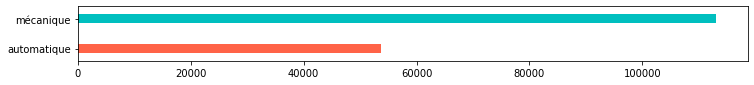

In [27]:
data_preproc['Gearbox'].value_counts().sort_values() \
    .plot(kind='barh', 
          color=['tomato', 'c'], 
          figsize=(12,1), 
          width=0.3 )

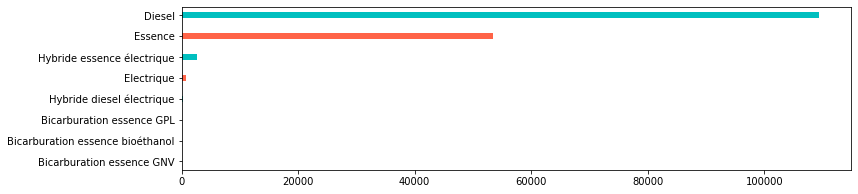

In [28]:
data_preproc['Fuel'].value_counts().sort_values() \
    .plot(kind='barh', 
          color=['tomato', 'c'], 
          figsize=(12,3), 
          width=0.3 )

In [29]:
data_preproc['Fuel'].value_counts().sort_values()

Bicarburation essence GNV                1
Bicarburation essence bioéthanol        21
Bicarburation essence GPL               96
Hybride diesel électrique              310
Electrique                             704
Hybride essence électrique            2725
Essence                              53392
Diesel                              109446
Name: Fuel, dtype: int64

Regrouper sous **Essence** les valeurs :
- Bicarburation essence GNV, 
- Bicarburation essence bioéthanol et 
- Bicarburation essence GPL  

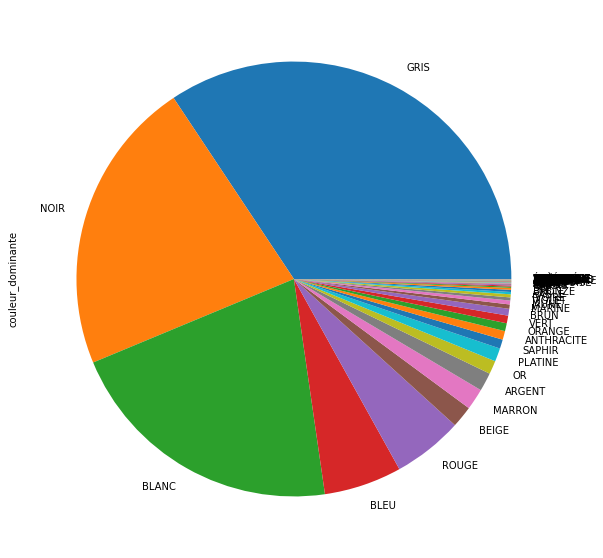

In [30]:
data_preproc['couleur_dominante'].unique()
data_preproc['couleur_dominante'].value_counts().plot.pie(figsize=(12,10))


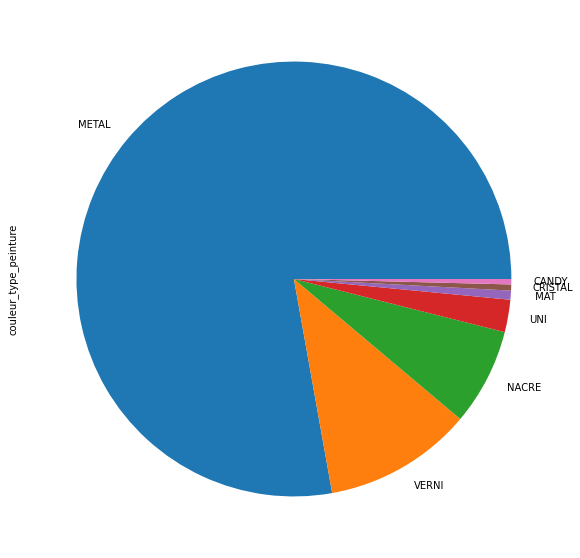

In [31]:
data_preproc['couleur_type_peinture'].value_counts().plot.pie(figsize=(12,10))


In [32]:
data_preproc['couleur_dominante'].unique()
data_preproc['couleur_type_peinture'].value_counts()


METAL      26305
VERNI       3735
NACRE       2435
UNI          814
 MAT         227
CRISTAL      153
CANDY        135
Name: couleur_type_peinture, dtype: int64

In [33]:
def outliers_prrocessing(df):
    df = df[df['Price']<=100000]
    df = df[df['Price']!=1]
    
    df = df[df['Cylindree']<=6]

    df = df[df['chevaux_vapeur']<=2110]

    df = df[df['age']>=0]
    df = df[df['age']<=25]

    df = df[df['puissance_fiscale']<=200]

    df = df[df['portes']>=2]
    df = df[df['portes']<=5]

    df = df[df['Mileage']<=200000]
    
    #df.loc[df['Fuel']=="Bicarburation essence GNV", 'Fuel'] = "Essence"
    #df.loc[df['Fuel']=="Bicarburation essence bioéthanol", 'Fuel'] = "Essence"
    #df.loc[df['Fuel']=="Bicarburation essence GPL", 'Fuel'] = "Essence"

    return df

In [34]:
data_outliers = outliers_prrocessing(data_preproc.copy())

## 5. Analyse bi-variable par rapport à la target

### 5.1. Les variables numériques

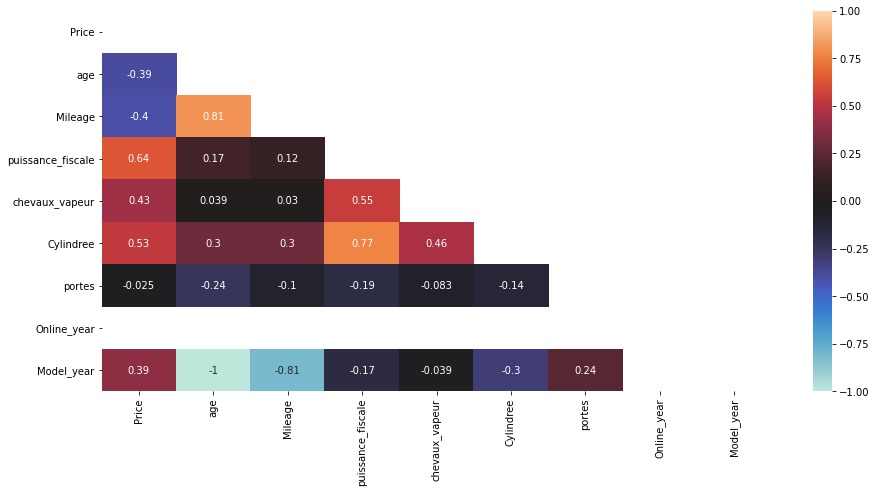

In [142]:
plt.figure(figsize=(15,7))
corr = data_outliers[['Price', 'age', 'Mileage', 'puissance_fiscale', 'chevaux_vapeur', 'Cylindree', 'portes',
                     'Online_year', 'Model_year']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, annot = True, vmin=-1, vmax=1, center= 0)

* Il y a correlation positive entre **Price** d'un côté et **puissance_fiscale**, **chevaux_veapeur**, **Cylindree**, et **Model_year** (pas très importante) de l'autre côté.
* Il y a une correlation négative entre **Price** et **age** / **Mileage**.

### 5.2. La variable 'Fuel'

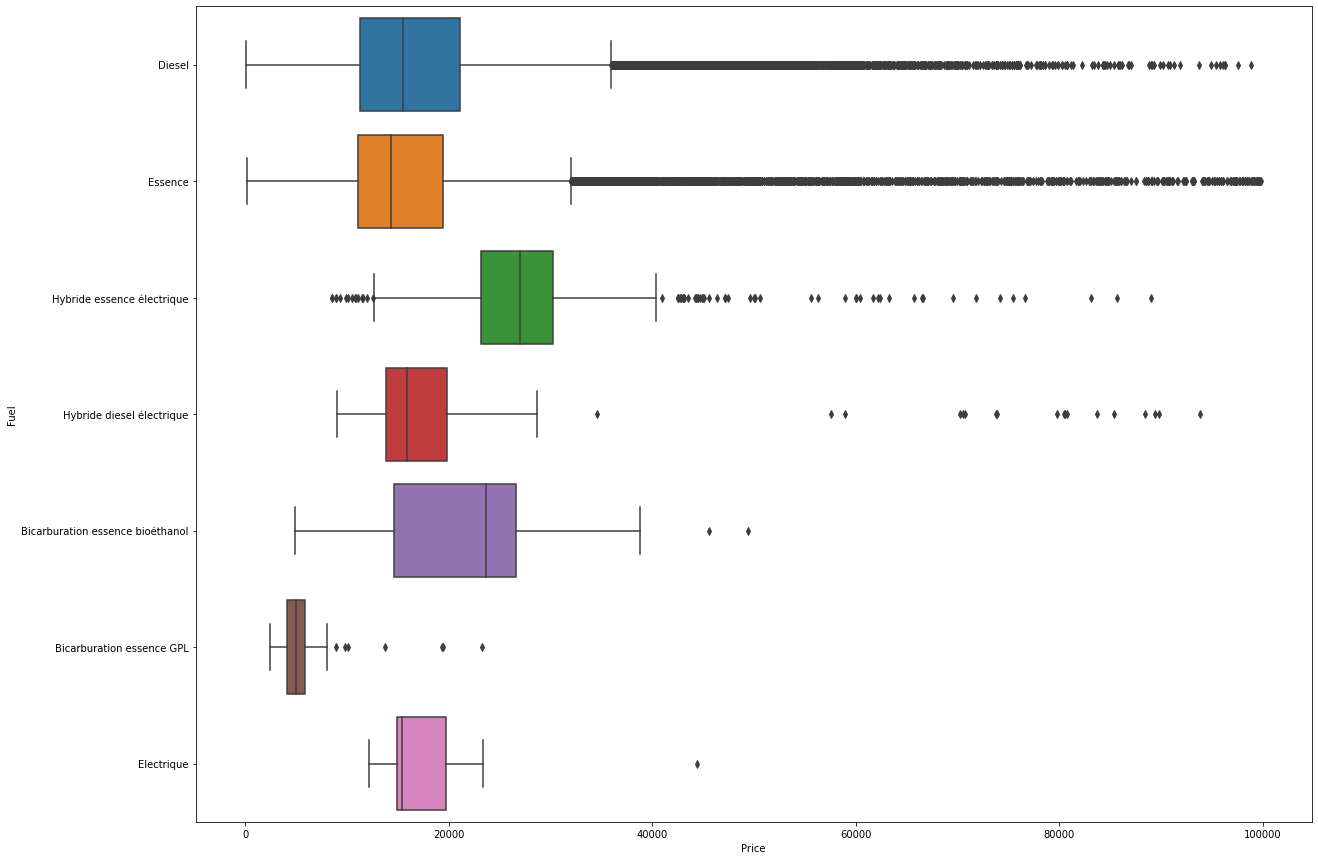

In [37]:
plt.figure(figsize=(20,15))
sns.boxplot('Price', 'Fuel', data=data_outliers)

**Les vehicules 'Hybride essence électrique' sont les plus chers en moyenne**

### 5.3. La variable 'Gearbox'

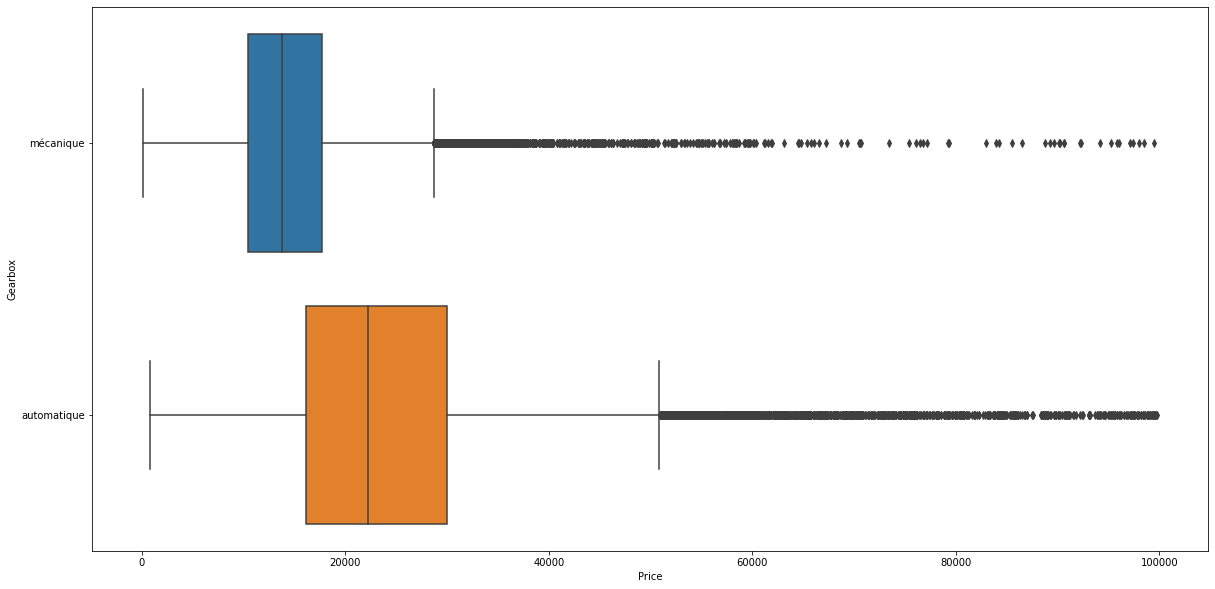

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot('Price', 'Gearbox', data=data_outliers)

**Les vehicules 'automatique' sont les plus chers en moyenne**

## 6. Modelisation

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn import ensemble
from sklearn.pipeline import Pipeline#, FeatureUnion
from sklearn import metrics

### 6.1. Définition de la metrique MAPE

In [42]:
# Définition de la metrique MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### 6.2. Définition des transformations de variables

In [112]:
## inspéré de : https://angelosalton.github.io/2019/01/29/predicting-car-prices-with-scikit-learn.html

def preproc_config(categorical_features, numeric_features, num_strat='median'):
    ######
    # Traitement des valeurs manquantes
    # Application de OneHotEncoder sur les variables qualitatives
    # Application de la standardisation sur les variable quantitatives (numériques)
    # Parametters: categorical_features, numeric_features, num_strat
    # return: ColumnTransformer
    ######
    
    # 1. numerical features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=num_strat)),
        ('scaler', StandardScaler())
        ])
    # 2. quantitaitive features
    # run once on full dataset to get all category values
    #temp = ColumnTransformer([('cat', OneHotEncoder(), categorical_features)]).fit(X)
    #cats = temp.named_transformers_['cat'].categories_

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(#categories=cats,
                                 sparse=False, handle_unknown='ignore'))
        ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    return preprocessor

### 6.3. Selection d'un échantillon

Selection d'un sous-ensemble d'observation afin de gagner en temps pendant l'entrainement de différent modèles (30% du dataset initial)

In [44]:
#data_sample = data_preproc.sample(frac=.3, random_state=42)
data_sample = data_outliers.sample(frac=.3, random_state=42)
data_sample.shape, data_outliers.shape

((38640, 27), (128800, 27))

### 6.4. Selection des features

In [102]:
target = 'Price'

# categorical features
categorical_features = ['Fuel', 'Gearbox', 'Make', 'Model', 'version']

# numerical features
numeric_features = ['Mileage', 'age', 'puissance_fiscale', 'portes', 'Cylindree','chevaux_vapeur']

In [103]:
X = data_sample[categorical_features+numeric_features].copy()
y = data_sample[target].values.copy() # prices$

# generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30912, 11), (7728, 11), (30912,), (7728,))

In [104]:
## Initialisation du ColumnTransformer pour la transformation des données
preprocessor = preproc_config(categorical_features, numeric_features)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Mileage', 'age', 'puissance_fiscale',
                                  'portes', 'Cylindree', 'chevaux_vapeur']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(categories=[array(['Bicarbur...
       'XV', 'YARIS', 'YETI', 'YPSILON', 'Z3', 'Z4', 'ZAFIRA',
       'ZAFIRA TOURER'], dtype=object),
                                                                            array(['"1.2 TCE 130 INTENS BOSE ""NEUF"""',
       '"IV 1.2 TCE 130  INTENS ""BOSE"""',
       '"IV 1.5 DCI 110  INTENS ""BOSE"" EDC"', ...,
       'X-PERIENCE 2.0 TDI 150 DSG7 4DRIVE',
       'X-PERIENCE 2.0 TDI S/S 150  DSG7 4DRIVE',
       'XCELLENCE 1.0 ECOTSI 95   START/STOP 5CV 112G/KM'], dtype=object)],
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Fuel', 'Gearbox', 'Make', 'Model',
                                  'version'])])

### 6.5. Entrainement de plusieurs modèles

In [56]:
# Liste des modèles à entrainer
models = [DummyRegressor(),
          KNeighborsRegressor(),
          linear_model.Lasso(),
          linear_model.Ridge(),
          linear_model.ElasticNet(),
          ensemble.GradientBoostingRegressor(),
          ensemble.RandomForestRegressor(),
          ensemble.ExtraTreesRegressor()]

models_names = ['Dummy','K-nn', 'Lasso','Ridge','Elastic','Boost','Forest','Extra']

In [57]:
# Liste des métriques pour chaque modèle
mape = []
scores = []

# Utilisation d'un pileline : Transformation de données --> entrainement d'un modèle sur la sortie
for model in models:
    pipe = Pipeline([
    ('preprocessor', preprocessor), # Transformation de données
    ('model', model) # entrainement d'un modèle
    ])
    fits = pipe.fit(X_train,y_train)
    mape.append(mean_absolute_percentage_error(y_test, fits.predict(X_test)))
    scores.append(metrics.r2_score(y_test, fits.predict(X_test)))


In [58]:
import os
os.system( "say ayema taaboute louzarrr" )

0

In [61]:
result_all_models = pd.DataFrame(data=list(zip(models_names, mape, scores)), columns=['model', 'mape', 'scores'])
result_all_models

,model,mape,scores
0,Dummy,51.116087,-0.000008
1,K-nn,14.623610,0.926501
2,Lasso,21.654910,0.872792
3,Ridge,16.046446,0.915186
4,Elastic,27.645226,0.695143
5,Boost,14.040848,0.905655
6,Forest,9.215177,0.950086
7,Extra,9.699340,0.954719


Text(0, 0.5, 'Score')

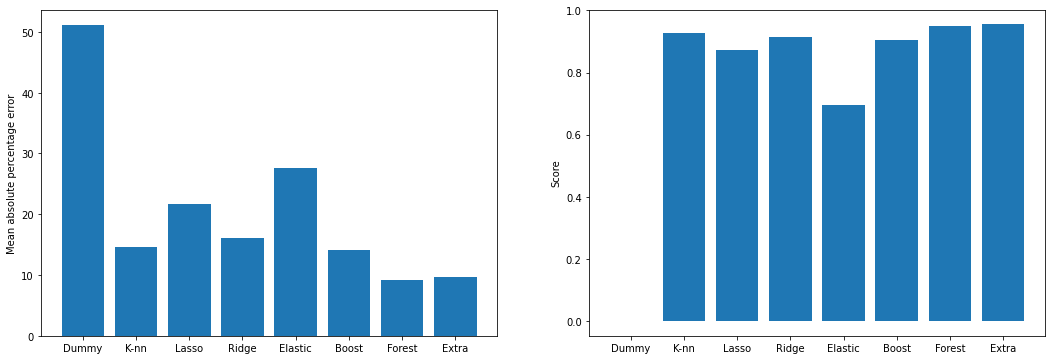

In [63]:
f, (ax1, ax2 ) = plt.subplots(ncols=2, sharex=True, sharey=False, figsize=(18,6))
ax1.bar(result_all_models['model'], result_all_models['mape'])
ax1.set_ylabel('Mean absolute percentage error')

ax2.bar(result_all_models['model'], result_all_models['scores'])
ax2.set_ylabel('Score')

**Le meilleur modèle en terme de minimisation de la MAPE est le RandomForest avec une MAPE = 9,22%**

### 6.6. Ajout de la feature 'couleur_dominante'

In [113]:
target = 'Price'

# categorical features
categorical_features = ['Fuel', 'Gearbox', 'Make', 'Model', 'version', 'couleur_dominante']

# numerical features
numeric_features = ['Mileage', 'age', 'puissance_fiscale', 'portes', 'Cylindree','chevaux_vapeur']

X = data_sample[categorical_features+numeric_features].copy()
y = data_sample[target].values.copy() # prices$

# generate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialisation du ColumnTransformer pour la transformation des données
preprocessor = preproc_config(categorical_features, numeric_features)

In [114]:
model = ensemble.RandomForestRegressor()

models_names = ['Forest']

mape = []
scores = []

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
    ])
fits = pipe.fit(X_train,y_train)
mape.append(mean_absolute_percentage_error(y_test, fits.predict(X_test)))
scores.append(metrics.r2_score(y_test, fits.predict(X_test)))

In [118]:
result_RF_couleur = pd.DataFrame(data=list(zip(models_names, mape, scores)), columns=['model', 'mape', 'scores'])
result_RF_couleur

,model,mape,scores
0,Forest,9.232104,0.950218


**La couleur n'est pas determinante dans la prédiction du prix**

### 6.7. Hyper-paramètre n_estimators=100

In [65]:
model = ensemble.RandomForestRegressor(n_estimators=100)

models_names = ['Forest']

mape = []
scores = []

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
    ])
fits = pipe.fit(X_train,y_train)
mape.append(mean_absolute_percentage_error(y_test, fits.predict(X_test)))
scores.append(metrics.r2_score(y_test, fits.predict(X_test)))


In [68]:
result_RF_100 = pd.DataFrame(data=list(zip(models_names, mape, scores)), columns=['model', 'mape', 'scores'])
result_RF_100

,model,mape,scores
0,Forest,9.200556,0.950516


**La performance de RandomForest peut être améliorée en jouant sur les hyper-paramères du modèle**

## 7. Conclusion :

* **Données manquantes :**
    * Il y a des données manquantes dans couleur_type_peinture, Cylindree, chevaux_vapeur, couleur_dominante, optioon, model, portes et couleur. Merger avec des données externes !

* **Variable Target :**
    * **Outliers :** 
        * Les prix supérieurs à 100.000€ sont à 0,5% dans le dataset (806 observation).
        * Les prix à 1€ sont à 0,002 (4 observations). Des valeurs abérentes
* **Les variables numériques :**
    * **Outliers :** 
        * Cylindree > 4 Litres: 137 observations,
        * chevaux_vapeur > 4 Litres: 13 observations,
        * age < 0 : 1 observation,
        * age > 25 ans : 365 observations,
        * puissance_fiscale > 200 ans : 4 observations,
        * nombre de portes <2 : 17 observations,
        * nombre de portes >5 : 2 observations,
        * Mileage > 200 000km : 1557 observations,
        * Mileage < 100km : 20653 observations (Ne pas supprimer),
* **Analyse bi-variable :**
    * Il y a correlation positive entre **Price** d'un côté et **puissance_fiscale**, **chevaux_veapeur**, **Cylindree**, et **Model_year** (pas très importante) de l'autre côté.
    * Il y a une correlation négative entre **Price** et **age** / **Mileage**.
    * Les vehicules 'Hybride essence électrique' sont les plus chers en moyenne
    * Les vehicules 'automatique' sont les plus chers en moyenne
* **Modelisation :**
    * RandomForest est le meilleur modèle en terme de minimisation de la MAPE (9.22%). 
    * La performance de RandomForest peut être améliorée en jouant sur les hyper-paramères du modèle.

In [191]:
# Sauvegarde des types des colonnes
target = 'Price'
key_categories = ['Make', 'Model', 'Fuel', 'Gearbox', 'modele', 'version', 'couleur', 'options',
                 'couleur_dominante','couleur_type_peinture']
key_numeriques = ['Mileage', 'age', 'puissance_fiscale', 'portes', 'Cylindree','chevaux_vapeur']
other_features = ['Model_year', 'Online', 'Online_date', 'Online_time', 'Online_year', 
                  'Online_month', 'Online_month_day', 'Online_hour', 'Online_minute', 'Online_week_day']

In [115]:
import os
os.system( "say ayema taaboute louzarrr" )

0